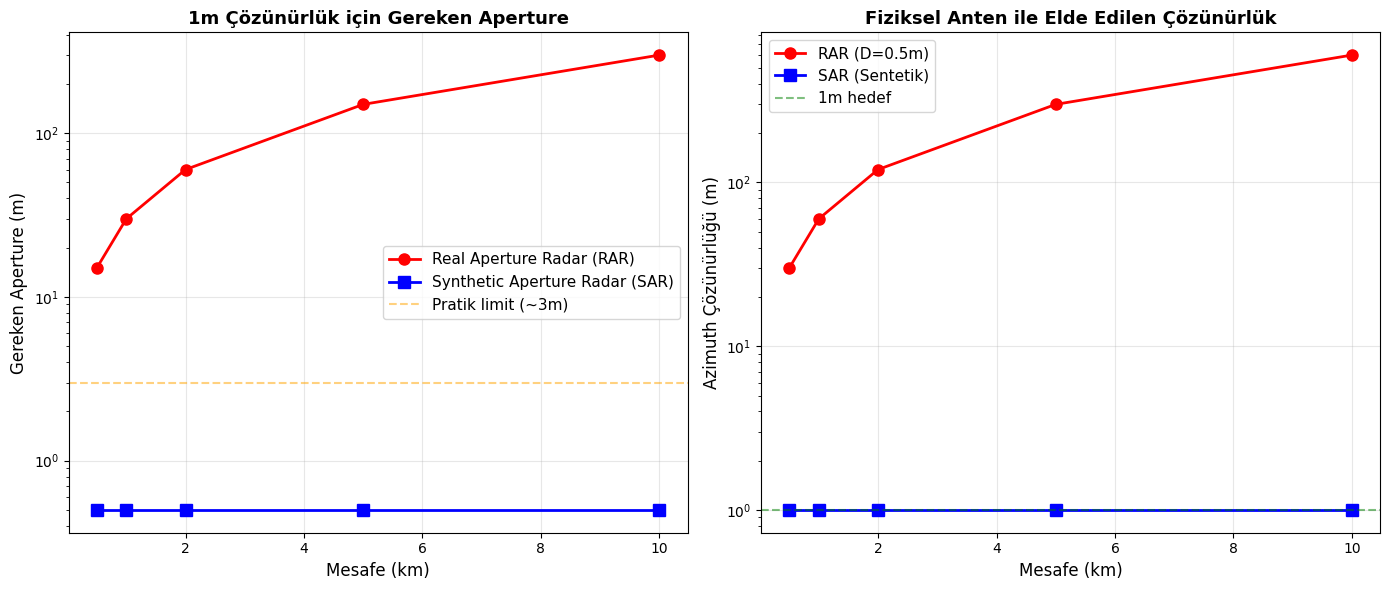


   Mesafe    |  RAR Aperture   |  SAR Aperture   |     RAR Avantajı     |        Durum        
    500      |      15.0      m |       0.5      m |         30.0        x |       IMKANSIZ      
    1000     |      30.0      m |       0.5      m |         60.0        x |       IMKANSIZ      
    2000     |      60.0      m |       0.5      m |        120.0        x |       IMKANSIZ      
    5000     |      150.0     m |       0.5      m |        300.0        x |       IMKANSIZ      
   10000     |      300.0     m |       0.5      m |        600.0        x |       IMKANSIZ      


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametreler
lambda_c = 0.03  # 3 cm (10 GHz)
ranges = np.array([500, 1000, 2000, 5000, 10000])  # metre

# Hedef: 1 metre çözünürlük
target_resolution = 1.0

# RAR için gereken aperture
RAR_aperture = ranges * lambda_c / target_resolution

# SAR için gereken aperture (basitleştirilmiş)
# SAR çözünürlüğü mesafeden bağımsız!
SAR_aperture = np.ones_like(ranges) * 0.5  # Sabit 0.5m

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Grafik 1: Aperture vs Mesafe
ax1.plot(ranges/1000, RAR_aperture, 'r-o', linewidth=2, 
         markersize=8, label='Real Aperture Radar (RAR)')
ax1.plot(ranges/1000, SAR_aperture, 'b-s', linewidth=2, 
         markersize=8, label='Synthetic Aperture Radar (SAR)')
ax1.axhline(3, color='orange', linestyle='--', alpha=0.5, 
            label='Pratik limit (~3m)')
ax1.set_xlabel('Mesafe (km)', fontsize=12)
ax1.set_ylabel('Gereken Aperture (m)', fontsize=12)
ax1.set_title('1m Çözünürlük için Gereken Aperture', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_yscale('log')

# Grafik 2: Çözünürlük karşılaştırması
D_physical = 0.5  # 0.5m fiziksel anten
RAR_resolution = ranges * lambda_c / D_physical
SAR_resolution = np.ones_like(ranges) * target_resolution  # SAR sabit

ax2.plot(ranges/1000, RAR_resolution, 'r-o', linewidth=2, 
         markersize=8, label=f'RAR (D={D_physical}m)')
ax2.plot(ranges/1000, SAR_resolution, 'b-s', linewidth=2, 
         markersize=8, label='SAR (Sentetik)')
ax2.axhline(1, color='g', linestyle='--', alpha=0.5, label='1m hedef')
ax2.set_xlabel('Mesafe (km)', fontsize=12)
ax2.set_ylabel('Azimuth Çözünürlüğü (m)', fontsize=12)
ax2.set_title('Fiziksel Anten ile Elde Edilen Çözünürlük', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

# Karşılaştırma tablosu
print("\n" + "="*90)
print(f"{'Mesafe':^12} | {'RAR Aperture':^15} | {'SAR Aperture':^15} | {'RAR Avantajı':^20} | {'Durum':^20}")
print("="*90)
for R in ranges:
    rar_ap = R * lambda_c / target_resolution
    sar_ap = 0.5
    advantage = rar_ap / sar_ap
    status = "IMKANSIZ" if rar_ap > 10 else "ZOR" if rar_ap > 3 else "MUMKUN"
    print(f"{R:^12.0f} | {rar_ap:^15.1f}m | {sar_ap:^15.1f}m | {advantage:^20.1f}x | {status:^20}")
print("="*90)